In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np


/home/v131v/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)


Failed to download (trying next):
<urlopen error [Errno -3] Temporary failure in name resolution>



100%|██████████| 9912422/9912422 [00:06<00:00, 1455578.63it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno -3] Temporary failure in name resolution>



100%|██████████| 28881/28881 [00:00<00:00, 256099.75it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 1910275.15it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 15862222.12it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, z):
        return self.fc(z).view(-1, 1, 28, 28)  # Возвращаем изображение 28x28

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.fc(x.view(-1, 28*28))  # Преобразуем изображение в вектор


In [ ]:
generator = Generator()
discriminator = Discriminator()

lr = 0.0002
beta1 = 0.5
optimizer_g = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))

# лосс
criterion = nn.BCELoss()


Epoch [1/50], Loss D: 0.6026074886322021, Loss G: 4.3023529052734375
Epoch [2/50], Loss D: 0.05544254556298256, Loss G: 4.270966053009033
Epoch [3/50], Loss D: 0.3729410767555237, Loss G: 2.4081380367279053
Epoch [4/50], Loss D: 0.33496999740600586, Loss G: 4.169830799102783
Epoch [5/50], Loss D: 0.5603299736976624, Loss G: 2.880394458770752
Epoch [6/50], Loss D: 0.5985516905784607, Loss G: 2.119636058807373
Epoch [7/50], Loss D: 0.6275568008422852, Loss G: 1.7568111419677734
Epoch [8/50], Loss D: 0.5484898090362549, Loss G: 2.360661745071411
Epoch [9/50], Loss D: 0.9045019745826721, Loss G: 1.4147785902023315
Epoch [10/50], Loss D: 0.6209989786148071, Loss G: 2.364805221557617


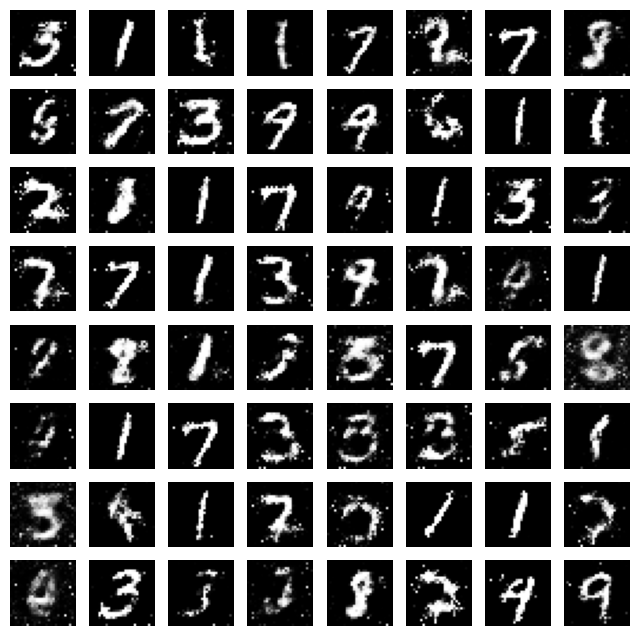

Epoch [11/50], Loss D: 0.9941900968551636, Loss G: 1.9635685682296753
Epoch [12/50], Loss D: 0.8196910619735718, Loss G: 1.8974018096923828
Epoch [13/50], Loss D: 1.06601881980896, Loss G: 1.7058295011520386
Epoch [14/50], Loss D: 0.9264833331108093, Loss G: 1.6935358047485352
Epoch [15/50], Loss D: 0.9874699115753174, Loss G: 1.3255488872528076
Epoch [16/50], Loss D: 0.83650803565979, Loss G: 1.7595367431640625
Epoch [17/50], Loss D: 1.0394865274429321, Loss G: 1.520497441291809
Epoch [18/50], Loss D: 0.915779709815979, Loss G: 1.8187330961227417
Epoch [19/50], Loss D: 0.890541672706604, Loss G: 1.829735279083252
Epoch [20/50], Loss D: 1.123854398727417, Loss G: 1.7518725395202637


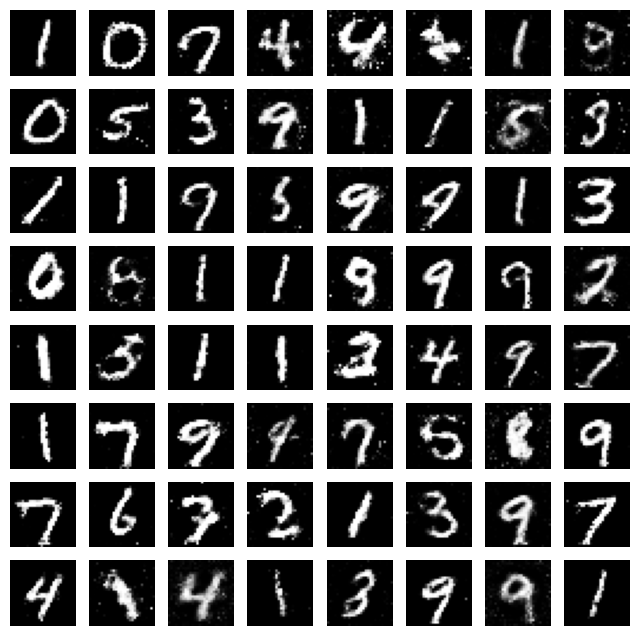

Epoch [21/50], Loss D: 1.0739052295684814, Loss G: 1.5014214515686035
Epoch [22/50], Loss D: 1.1244535446166992, Loss G: 1.2829326391220093
Epoch [23/50], Loss D: 0.8591283559799194, Loss G: 1.813758373260498
Epoch [24/50], Loss D: 0.9385174512863159, Loss G: 1.4904711246490479
Epoch [25/50], Loss D: 0.8446530699729919, Loss G: 1.842261552810669
Epoch [26/50], Loss D: 1.062741994857788, Loss G: 1.2860078811645508
Epoch [27/50], Loss D: 1.0439701080322266, Loss G: 1.3727977275848389
Epoch [28/50], Loss D: 1.187974452972412, Loss G: 2.035637140274048
Epoch [29/50], Loss D: 1.0296976566314697, Loss G: 1.3053314685821533
Epoch [30/50], Loss D: 1.0751584768295288, Loss G: 2.2028579711914062


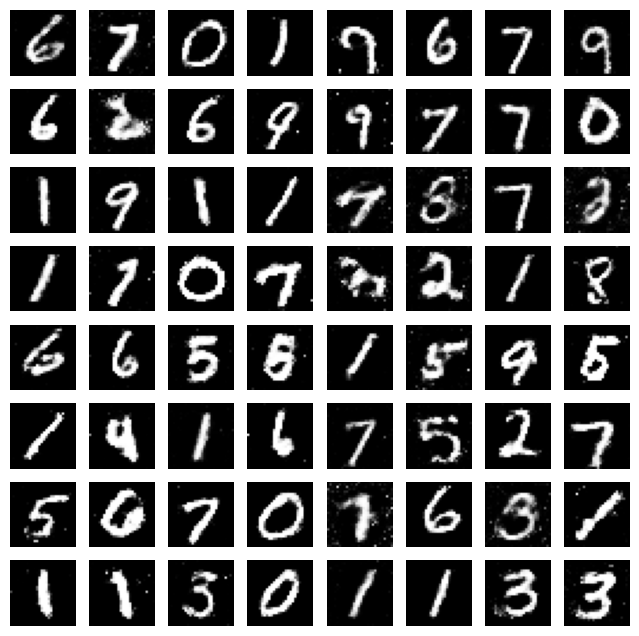

Epoch [31/50], Loss D: 0.7766255736351013, Loss G: 1.8987902402877808
Epoch [32/50], Loss D: 1.0610735416412354, Loss G: 1.4354115724563599
Epoch [33/50], Loss D: 1.1159363985061646, Loss G: 1.6480863094329834
Epoch [34/50], Loss D: 1.0160528421401978, Loss G: 1.869399070739746
Epoch [35/50], Loss D: 1.2340474128723145, Loss G: 1.5054080486297607
Epoch [36/50], Loss D: 0.8901039361953735, Loss G: 1.5140388011932373
Epoch [37/50], Loss D: 0.8981204032897949, Loss G: 1.4351603984832764
Epoch [38/50], Loss D: 0.882915735244751, Loss G: 1.7306809425354004
Epoch [39/50], Loss D: 1.0508594512939453, Loss G: 1.5358704328536987
Epoch [40/50], Loss D: 0.9614161849021912, Loss G: 1.486203908920288


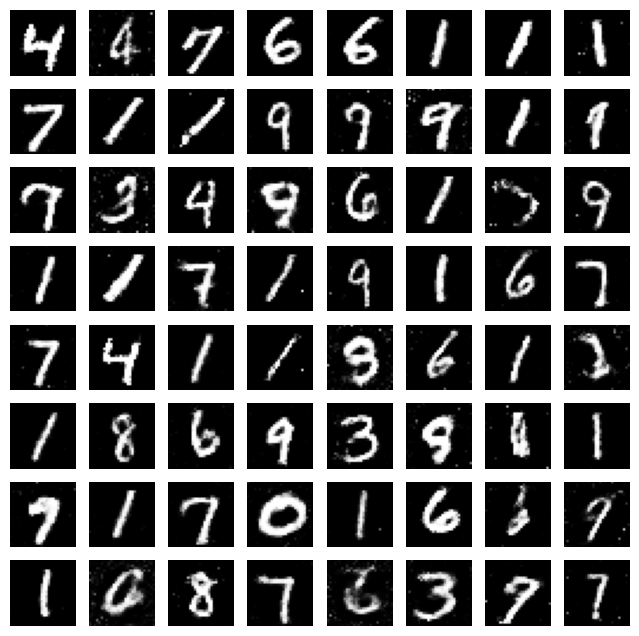

Epoch [41/50], Loss D: 1.1111048460006714, Loss G: 1.6846656799316406
Epoch [42/50], Loss D: 0.9301965832710266, Loss G: 1.3784228563308716
Epoch [43/50], Loss D: 0.8589566946029663, Loss G: 1.8874735832214355
Epoch [44/50], Loss D: 1.1758527755737305, Loss G: 1.1448276042938232
Epoch [45/50], Loss D: 0.8910341262817383, Loss G: 2.2187979221343994
Epoch [46/50], Loss D: 1.0732113122940063, Loss G: 1.708265781402588
Epoch [47/50], Loss D: 1.0479754209518433, Loss G: 1.7193573713302612
Epoch [48/50], Loss D: 0.9928092956542969, Loss G: 1.7111899852752686
Epoch [49/50], Loss D: 0.8427324295043945, Loss G: 1.7221773862838745
Epoch [50/50], Loss D: 0.9549188613891602, Loss G: 1.9214552640914917


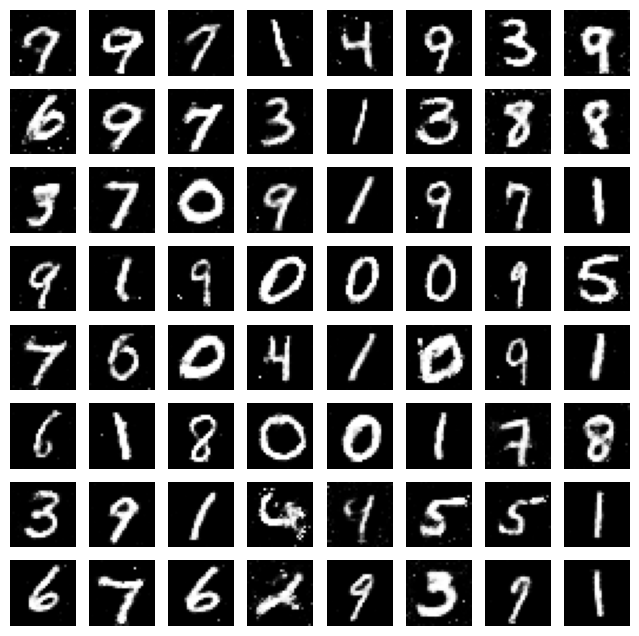

In [ ]:
num_epochs = 50
real_label = 1
fake_label = 0

for epoch in range(num_epochs):
    for i, (images, _) in enumerate(train_loader):
        batch_size = images.size(0)

        labels = torch.full((batch_size, 1), real_label, dtype=torch.float)  # Преобразуем метки в (batch_size, 1)
        output = discriminator(images)
        loss_d_real = criterion(output, labels)

        z = torch.randn(batch_size, 100)
        fake_images = generator(z)

        labels = torch.full((batch_size, 1), fake_label, dtype=torch.float)
        labels = labels.view(-1, 1)  # Преобразуем метки в (batch_size, 1)
        output = discriminator(fake_images.detach())
        loss_d_fake = criterion(output, labels)

        loss_d = loss_d_real + loss_d_fake

        # Обновление дискриминатора
        optimizer_d.zero_grad()
        loss_d.backward()
        optimizer_d.step()

        # Обучение генератора
        labels.fill_(real_label)
        output = discriminator(fake_images)
        loss_g = criterion(output, labels)

        # Обновление генератора
        optimizer_g.zero_grad()
        loss_g.backward()
        optimizer_g.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss D: {loss_d.item()}, Loss G: {loss_g.item()}')

    if (epoch+1) % 10 == 0:
        with torch.no_grad():
            z = torch.randn(64, 100)
            fake_images = generator(z)
            fake_images = fake_images.detach().cpu().numpy()
            fig, ax = plt.subplots(8, 8, figsize=(8, 8))
            for i in range(8):
                for j in range(8):
                    ax[i, j].imshow(fake_images[i * 8 + j].reshape(28, 28), cmap='gray')
                    ax[i, j].axis('off')
            plt.show()


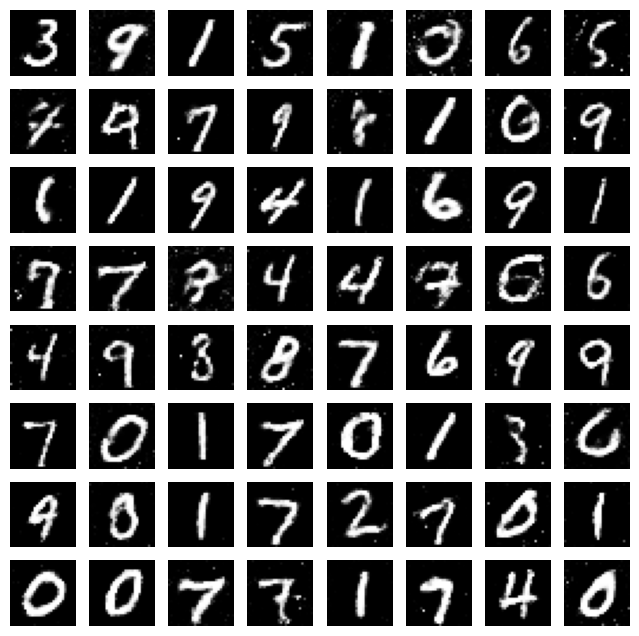

In [ ]:
with torch.no_grad():
    z = torch.randn(64, 100)
    fake_images = generator(z)
    fake_images = fake_images.detach().cpu().numpy()

    fig, ax = plt.subplots(8, 8, figsize=(8, 8))
    for i in range(8):
        for j in range(8):
            ax[i, j].imshow(fake_images[i * 8 + j].reshape(28, 28), cmap='gray')
            ax[i, j].axis('off')
    plt.show()
